In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import time

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#from function import *
from catboost import CatBoostClassifier, Pool
from datetime import datetime
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load Data set

In [3]:
df = pd.read_csv('.\data\global_sports_footwear_sales_2018_2026.csv')

In [6]:
df.head(2)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
0,ORD100000,2021-01-30,ASICS,Model-370,Running,Unisex,8,Black,162,15,137.7,1,137.7,Card,Retail Store,Germany,Low,4.6
1,ORD100001,2026-10-05,Reebok,Model-314,Lifestyle,Men,8,Grey,80,5,76.0,3,228.0,Card,Online,USA,Low,3.9


In [7]:
df.shape

(30000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  object 
 1   order_date             30000 non-null  object 
 2   brand                  30000 non-null  object 
 3   model_name             30000 non-null  object 
 4   category               30000 non-null  object 
 5   gender                 30000 non-null  object 
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  object 
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  int64  
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  object 
 14  sales_channel          30000 non-null  object 
 15  co

In [10]:
df.isnull().sum()

order_id                 0
order_date               0
brand                    0
model_name               0
category                 0
gender                   0
size                     0
color                    0
base_price_usd           0
discount_percent         0
final_price_usd          0
units_sold               0
revenue_usd              0
payment_method           0
sales_channel            0
country                  0
customer_income_level    0
customer_rating          0
dtype: int64

In [11]:
df.describe()

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,8.500867,139.634633,13.332167,121.029035,2.500200,302.714948,4.001543
std,1.710896,46.062549,9.864198,42.511586,1.121149,179.149272,0.577546
min,6.000000,60.000000,0.000000,42.000000,1.000000,42.000000,3.000000
25%,7.000000,100.000000,5.000000,85.000000,1.000000,156.750000,3.500000
50%,9.000000,140.000000,10.000000,119.200000,3.000000,268.200000,4.000000
75%,10.000000,180.000000,20.000000,153.600000,4.000000,414.000000,4.500000
max,11.000000,219.000000,30.000000,219.000000,4.000000,876.000000,5.000000


In [12]:
df.shape

(30000, 18)

# Explore Data

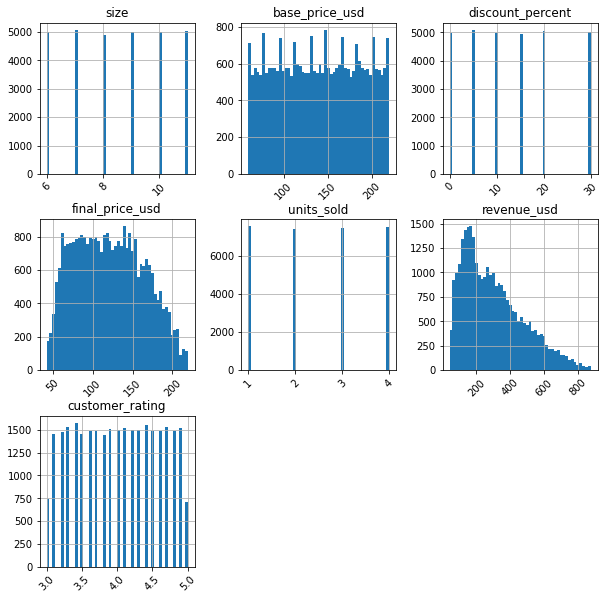

In [13]:
df.hist(figsize=(10,10), xrot=45,bins=50)
plt.show()

In [14]:
plt.figure(figsize=(35,35))
sns.heatmap(data = df.corr(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

ValueError: could not convert string to float: 'ORD100000'

<Figure size 2520x2520 with 0 Axes>